# 회귀모델 연습

## 1. import 처리
- 수치계산용 라이브러리 numpy, 그래프 그리기용 라이브러리 matplotlib.pyplot import
- %matplotlib inline: 주피터노트북 전용명령, 노트북셀 안에서 바로 보여주도록 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. 단순선형회귀
- rand(100): 기본값으로 0과 1사이 지정되어 있음. 그 사이에 100개 숫자 뽑아냄
- X값에 랜덤숫자 100개 뽑아내서 X에 저장
- y에 가중치x입력값x추가스케일
- 그래프 그림

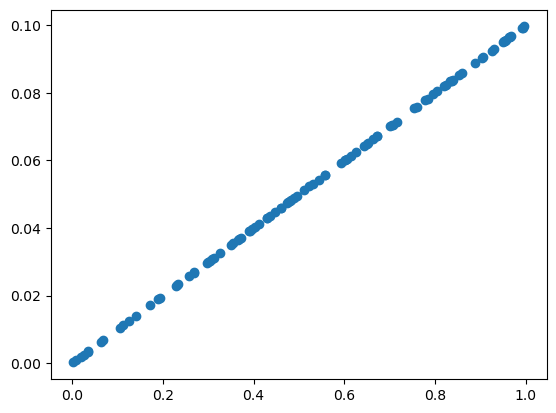

In [2]:
X = np.random.rand(100)
y = 0.2*X*0.5
plt.scatter(X,y)

### 실제값과 예측값 함수정의
- X는 글로벌 변수이므로 정의하지 않음. 
- 파라미터로 예측y값과 실제y값 입력하게 함수 만듬
- 그림판 사이즈는 8,6
- 산점도 X값 그대로, y값은 2가지
- legend(): label값 표시, .show()그래프를 화면에 출력

In [5]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

### 경사하강법, 가중치
- W는 가중치로 X가 y에 얼마나 영향을 주는지 결정하는 숫자. 기울기. 0이 아닌 작은 숫자로 시작해야
- np.random.uniform(-1,1) numpy로 랜덤 숫자를 추출하되 -1과 1사이에서 숫자 1개를 뽑는다.
- uniform은 모든 숫자가 나올 확률이 동일함.
- b는 y절편으로 W와 같은 방식으로 추출
- learning_rate = W와 b를 조정할 때 한 번에 얼마나 크게 바꿀지 정하는 값, 한 번에 W와 b를 얼마나 크게 바꿀지 정하는 숫자, 숫자가 너무 크면 학습이 불안정, 너무 작으면 학습이 느리다.

In [6]:
# 경사하강법 y=wX+b 의 가중치와 편향의 초기값 설정
W = np.random.uniform(-1,1) #X의 가중치
b = np.random.uniform(-1,1) #b 편향
learning_rate = 0.5 #학습율

### 반복학습
- epoch = 학습 반복 횟수 (머신러닝에서는 “몇 번 학습했는지” 의미)
- range(100) → 0부터 99까지 총 100번 반복
- 가중치W와 입력값X, y절편 b 계산하여 y 예측값으로 계산함
- (y_pred 예측y값-y는 실제값), np.abs는 이 차이의 절대값. mean(): 모든 데이터의 절댓값 오차를 평균 = 모델 예측값과 실제값 사이의 평균 절대 오차(MAE) 계산
- MAE 값이 작을수록 모델이 정확히 맞췄다는 뜻. 10은? 한 데이터당 10만큼 틀림
- MAE = “모델이 평균적으로 얼마만큼 빗나갔는지를 숫자로 알려주는 눈금”

In [ ]:
for epoch in range(100):
  y_pred = W * X + b
  
  error = np.abs(y_pred - y).mean()  #평균절대오차 MAE
  
  if error < 0.001 :
    break
  
  #경사하강법에 의한 W,b의 조정
  W_descent = learning_rate * ( (y_pred - y)*X).mean()
  b_descent = learning_rate * ( (y_pred - y)).mean()
  W = W - W_descent
  b = b - b_descent
  
  #10epoch마다 시각화
  if epoch%10 == 0 :
    print( f'epoch {epoch}, W: {W:.4f}, Error: {error:.4f}')
    y_pred = W*X + b
    plt_prediction(y_pred, y)
  